# Binary classification
### Generate some train/test data

In [1]:
import numpy as np
np.random.seed(667)

import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve

X, y = make_classification(n_samples=80000)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

In [2]:
y  #binary classification

array([0, 0, 1, ..., 0, 1, 0])

### Build and train a Keras classifier model as usual

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def build_model():
    model = Sequential()
    model.add(Dense(20, input_dim=20, activation='relu'))
    model.add(Dense(40, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [5]:
keras_model = build_model()
keras_model.fit(X_train, y_train, 
                epochs=5, 
                batch_size=100, 
                verbose=1
                )

Epoch 1/5
400/400 [==============================] - 1s 2ms/step - loss: 0.3255 - accuracy: 0.8697
Epoch 2/5
400/400 [==============================] - 1s 2ms/step - loss: 0.2298 - accuracy: 0.9147
Epoch 3/5
400/400 [==============================] - 1s 2ms/step - loss: 0.2130 - accuracy: 0.9208
Epoch 4/5
400/400 [==============================] - 1s 2ms/step - loss: 0.1996 - accuracy: 0.9270
Epoch 5/5
400/400 [==============================] - 1s 2ms/step - loss: 0.1880 - accuracy: 0.9328


### Use trained Keras model to predict test inputs and generate ROC data
* fpr: False positive rate
* tpr: True positive rate

False Positive Rate$$
FPR=\frac{FP}
{N}=\frac{FP}
{FP+TN}\\
$$
Where FP is the number of false positives, TN is the number of true negatives and N=FP+TN is the total number of negatives.
True Positive Rate$$
TPR=\frac{TP}
{P}=\frac{TP}
{FN+TP}\\
$$
Where TP is the number of true positives, FN is the number of false negatives and P=FN+TP is the total number of positives.


In [6]:
y_pred_keras = keras_model.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)

### Calculate AUC (area under curve)

In [7]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)
auc_keras

0.977077854873666

## Train another classifier to compare with Keras model

In [8]:
# Supervised transformation based on random forests
rf = RandomForestClassifier(max_depth=3, n_estimators=10)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_rf)
auc_rf = auc(fpr_rf, tpr_rf)

### Plot the ROC curve

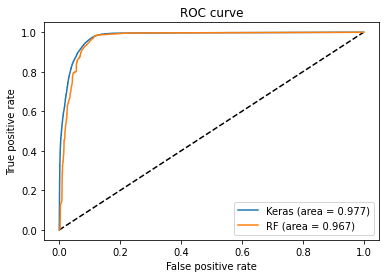

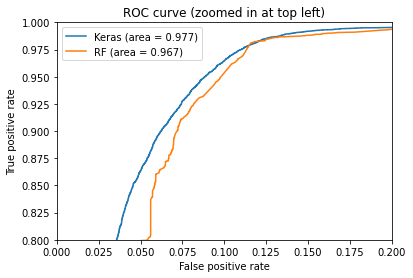

In [9]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
#############################################################################
# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()

# Multi-class classification

### Generate some train/test data
3 classes to classify

In [10]:
from sklearn.datasets import make_classification
from sklearn.preprocessing import label_binarize

# 3 classes to classify
n_classes = 3

X, y = make_classification(n_samples=80000, 
                           n_features=20, 
                           n_informative=3, 
                           n_redundant=0, 
                           n_classes=n_classes,
                            n_clusters_per_class=2)

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
X_train

array([[-0.17090711,  2.18997457,  0.66316575, ...,  0.79580183,
        -0.11305603,  0.09724058],
       [-0.77250316,  1.23161156,  1.27938589, ..., -1.31350333,
        -0.59079454, -0.04869242],
       [-0.97520909,  2.19916282, -0.69329263, ...,  1.20009673,
        -0.35327195,  1.27744402],
       ...,
       [ 0.77137228, -2.89843878, -1.06594204, ...,  1.91006056,
        -0.64161855,  0.11062992],
       [ 0.67907437,  0.24058342, -0.20192142, ..., -0.26965663,
         0.45571426, -0.54441817],
       [ 0.48520808, -0.0308949 ,  0.45830724, ..., -1.1255768 ,
        -0.98937395,  0.84602701]])

### Build and train Keras model

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def build_model():
    model = Sequential()
    model.add(Dense(20, input_dim=20, activation='relu'))
    model.add(Dense(40, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [12]:
keras_model2 = build_model()
keras_model2.fit(X_train, y_train, epochs=10, batch_size=100, verbose=1)

Epoch 1/10
400/400 [==============================] - 1s 2ms/step - loss: 0.7448 - accuracy: 0.6655
Epoch 2/10
400/400 [==============================] - 1s 2ms/step - loss: 0.4422 - accuracy: 0.8277
Epoch 3/10
400/400 [==============================] - 1s 2ms/step - loss: 0.3949 - accuracy: 0.8478
Epoch 4/10
400/400 [==============================] - 1s 2ms/step - loss: 0.3765 - accuracy: 0.8556
Epoch 5/10
400/400 [==============================] - 1s 2ms/step - loss: 0.3644 - accuracy: 0.8607
Epoch 6/10
400/400 [==============================] - 1s 2ms/step - loss: 0.3556 - accuracy: 0.8642
Epoch 7/10
400/400 [==============================] - 1s 2ms/step - loss: 0.3496 - accuracy: 0.8668
Epoch 8/10
400/400 [==============================] - 1s 2ms/step - loss: 0.3432 - accuracy: 0.8705
Epoch 9/10
400/400 [==============================] - 1s 2ms/step - loss: 0.3386 - accuracy: 0.8730
Epoch 10/10
400/400 [==============================] - 1s 2ms/step - loss: 0.3337 - accuracy: 0.8745

### Make prediction for test inputs

In [13]:
y_score = keras_model2.predict(X_test)

### Plot ROC for each of the 3 classes

Use micro and marco averaging to evaluate the overall performance across all classes.
$$
precision=PRE=\frac{TP}
{TP+FP}\\
$$
 In “micro averaging”, we’d calculate the performance, e.g., precision, from the individual true positives, true negatives, false positives, and false negatives of the the k-class model:
$$
PRE_{micro}=\frac{TP_{1}+\dots+TP_{k}}
{TP_{1}+\dots+TP_{k}+FP_{1}+\dots+FP_{k}}\\
$$
And in macro-averaging, we average the performances of each individual class:
$$
PRE_{marco}=\frac{PRE_{1}+\dots+PRE_{k}}
{k}\\
$$

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


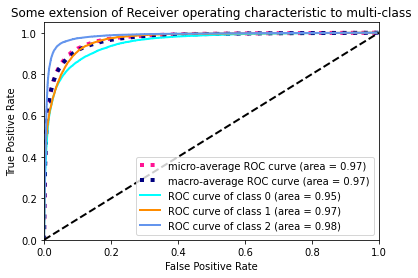

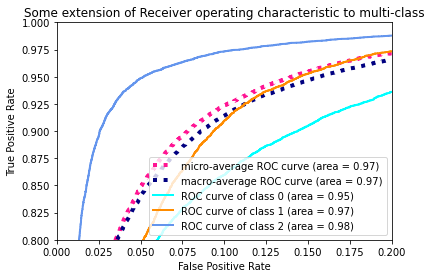

In [14]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc

# Plot linewidth.
lw = 2

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

####################################################################################
# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()